# How did  Capomulin perefornance in terms of tumour volume perform versus the other treatment regimens.
# need to consider the starting tumour volume and the volume changes over the course of the treatment 

Capomulin	230


In [ ]:
# Matplotlib Homework - The Power of Plots

## Background

What good is data without a good plot to tell the story?

So, let's take what you've learned about Python Matplotlib and apply it to a real-world situation and dataset:

![Laboratory](Images/Laboratory.jpg)

While your data companions rushed off to jobs in finance and government, 
you remained adamant that science was the way for you. 
Staying true to your mission, you've joined Pymaceuticals Inc., 
a burgeoning pharmaceutical company based out of San Diego. 
Pymaceuticals specialises in anti-cancer pharmaceuticals. 
In its most recent efforts, it began screening for potential treatments for squamous cell carcinoma (SCC),
a commonly occurring form of skin cancer.

As a senior data analyst at the company, you've been given access to the complete data
from their most recent animal study. 
In this study, 249 mice identified with SCC tumour growth were treated through a variety of drug regimens. 
Over the course of 45 days, tumour development was observed and measured. 
The purpose of this study was to compare the performance of Pymaceuticals'
drug of interest, Capomulin, versus the other treatment regimens. 
You have been tasked by the executive team to generate all of the tables and figures 
needed for the technical report of the study. 
The executive team also has asked for a top-level summary of the study results.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [3]:
# Load in csv's
mouse_metadata_df = pd.read_csv("Resources/Mouse_metadata.csv")
study_results_df = pd.read_csv("Resources/Study_results.csv")
#Show data fields for first data set and identify number of mice in the trial 
mouse_metadata_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
#Check number of rows pre merge and pre removal of duplicates 
#len(study_results_df["Timepoint"].count())

In [6]:
mouse_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [7]:
study_results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [8]:
mouse_metadata_df.describe()

,Age_months,Weight (g)
count,249.000000,249.000000
mean,12.730924,26.116466
std,7.228687,3.697003
min,1.000000,15.000000
25%,6.000000,25.000000
50%,13.000000,27.000000
75%,19.000000,29.000000
max,24.000000,30.000000



* Before beginning the analysis, check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID.

In [9]:
study_results_df.describe()
# to get the median look for print our graphs as well as inforamtion - cardiality - linear collarity - pandas-profiling 
#do pip install 

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659
std,14.079460,8.894722,1.137974
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.951474,1.000000
75%,30.000000,56.292200,2.000000
max,45.000000,78.567014,4.000000


In [10]:
## Combine the data into a single dataset
# Merge data for the squamous cell carcinoma(SCC) study- joining on Mouse ID and create one single data set  

scc_clinical_trial_df = pd.merge(mouse_metadata_df,study_results_df, on="Mouse ID")

## Display the data table for preview 
scc_clinical_trial_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
##checking for number of mice 
## Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#confirm number of unique mice in the trial - check no duplicates in data set before adding study results 
#timepoints and present in a table 
number_of_mice = scc_clinical_trial_df["Mouse ID"].nunique()

total_mice_df = pd.DataFrame({"Total Mice":[number_of_mice]})
total_mice_df

,Total Mice
0,249


In [12]:
### Optional: Get all the data for the duplicate mouse ID. 
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = scc_clinical_trial_df.loc[scc_clinical_trial_df.duplicated(subset=
['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
clean_scc_clinical_trial_df = scc_clinical_trial_df[scc_clinical_trial_df['Mouse ID'].isin(duplicate_mouse_ids)==True]
clean_scc_clinical_trial_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [13]:
### Optional: Get all the data for the duplicate mouse ID. 
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = scc_clinical_trial_df.loc[scc_clinical_trial_df.duplicated(subset=
['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
clean_scc_clinical_trial_df = scc_clinical_trial_df[scc_clinical_trial_df['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_scc_clinical_trial_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [14]:
clean_scc_clinical_trial_df["Mouse ID"].nunique()

248

In [16]:
#confirm number of unique mice in the trial - after data cleaning
number_of_mice = clean_scc_clinical_trial_df["Mouse ID"].nunique()

total_mice_df = pd.DataFrame({"Total Mice":[number_of_mice]}) 
total_mice_df


,Total Mice
0,248


# * Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumour volume for each drug regimen.

In [17]:
#Generate a summary statistics table consisting of the mean, median, variance, standard deviation, 
#and SEM of the tumour volume for each drug regimen.

#Use groupby function tp group data into the different drug regimens ready for analysis 

drug_regimen_groups = clean_scc_clinical_trial_df.groupby(["Drug Regimen"])


In [18]:
# Generate the average/mean of tumor volume
average_tumour_volume = drug_regimen_groups["Tumor Volume (mm3)"].mean()

# Generate the median of tumor volume
median_tumour_volume = drug_regimen_groups["Tumor Volume (mm3)"].median()

# Generate the variance of tumor volume
variance_tumour_volume = drug_regimen_groups["Tumor Volume (mm3)"].var()

#Generate the standard deviation of tumor volume
sdev_tumour_volume = drug_regimen_groups["Tumor Volume (mm3)"].std()

#Generate the SEM of tumor volume
sem_tumour_volume = drug_regimen_groups["Tumor Volume (mm3)"].sem()

#Generate a new dataframe with new information

drug_regimen_summary_df = pd.DataFrame({ 
    "Mean Tumor Volume":average_tumour_volume, 
    "Median Tumor Volume":median_tumour_volume, 
    "Variance Tumor Volume":variance_tumour_volume, 
    "Standard Deviation Tumor Volume":sdev_tumour_volume,
    "SEM Tumor Volume":sem_tumour_volume  
})

#Set to 2 decimap points 
drug_regimen_summary_df ["Mean Tumor Volume"]=drug_regimen_summary_df["Mean Tumor Volume"].map("{:,.2f}".format)
drug_regimen_summary_df ["Median Tumor Volume"]=drug_regimen_summary_df["Median Tumor Volume"].map("{:,.2f}".format)
drug_regimen_summary_df ["Variance Tumor Volume"]=drug_regimen_summary_df["Variance Tumor Volume"].map("{:,.2f}".format)
drug_regimen_summary_df ["Standard Deviation Tumor Volume"]=drug_regimen_summary_df["Standard Deviation Tumor Volume"].map("{:,.2f}".format)
drug_regimen_summary_df ["SEM Tumor Volume"]=drug_regimen_summary_df["SEM Tumor Volume"].map("{:,.2f}".format)

drug_regimen_summary_df


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


* Generate a bar plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows  the number of total mice for each treatment regimen throughout the course of the study.

<AxesSubplot:title={'center':'Total Measurements per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total Mice'>

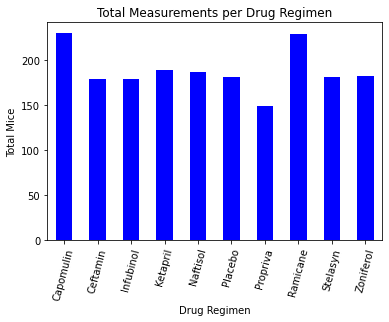

In [24]:

#* Generate a bar plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` 
#that shows  the number of total mice for each treatment regimen throughout the course of the study.

#PANDA"S Data Frame Plot 

total_mice_per_drug_regimen = drug_regimen_groups["Mouse ID"].count()
plt = total_mice_per_drug_regimen.plot.bar( rot = 75, fontsize =10, color = "b")
plt.set_xlabel("Drug Regimen")
plt.set_ylabel("Total Mice")
plt.set_title("Total Measurements per Drug Regimen")

plt


In [28]:
#Generate a list of each of the drug_regimen_groups and number of mice per group to enble easier analysis 
#the graph provides an overview and estimate - seeing the number as well enabeles deeper analysis and insights 

#number_of_mice = scc_clinical_trial_df["Mouse ID"].nunique()
total_mice_per_drug_regimen_df = pd.DataFrame({"Total Mice":total_mice_per_drug_regimen})
total_mice_per_drug_regimen_df

,Total Mice
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Infubinol,178
Ceftamin,178
Propriva,148


In [ ]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of 
#the study using pyplot.






In [26]:
#Matplotlib's `pyplot` 
total_mice_per_drug_regimen = clean_scc_clinical_trial_df["Drug Regimen"].value_counts()
#total_mice_per_drug_regimen = drug_regimen_groups["Mouse ID"].nunique()
plt.bar(total_mice_per_drug_regimen.index.values, total_mice_per_drug_regimen.values,color='b', width=0.5)
plt.xticks(rotation = 75, fontsize =10)
plt.xlabel("Drug Regimen") 
plt.ylabel("Total Mice")
plt.title("Total Measurements per Drug Regimen")
plt.show()


AttributeError: 'AxesSubplot' object has no attribute 'xticks'

In [ ]:
# Create an array that contains the number of totql mice each drug regimen has
total_mice_per_drug_regiment = [230, 26000, 52000, 30000, 9000]
x_axis = np.arange(len(users))

* Generate a pie plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows the distribution of female or male mice in the study.

In [ ]:
groupby_gender = Combined_data.groupby(["Mouse ID","Sex"])
groupby_gender
gender_df = pd.DataFrame(groupby_gender.size())


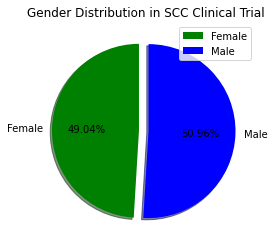

In [32]:
# Generate a pie plot using both Pandas's `DataFrame.plot()that shows the distribution of female or male mice in the study.

# Generate a pie plot showing the distribution of female versus male mice using pandas
#Separate female and male mice 

mouse_gender_study = clean_scc_clinical_trial_df.groupby(["Sex"]).count()

# Create a pie chart 
mice_Gender_piepd = mouse_gender_study.plot(kind="pie", y='Mouse ID', title=("Gender Distribution in SCC Clinical Trial "),
                            colors = ["g","b"],autopct = "%.2f%%", explode = [0.1, 0.01], 
                                     shadow = True,startangle=90)

#use ylabel("") to remove the mouse ID so it doesn't crach with Female
mice_Gender_piepd.set_ylabel("")

#Adjust the position of the label with bbox_to_anchor so it does not overlap the cahrt
#mice_Gender_piepd.legend(loc='upper right', frameon=True, bbox_to_anchor=(1.15, 1))

mice_Gender_piepd.legend = True

mice_Gender_piepd.labeldistance = None




In [55]:
#  Group by gender and get the number to plot
mouse_gender_study = clean_scc_clinical_trial_df.groupby(["Mouse ID","Sex"])
mouse_gender_study 
#mouse_gender_study = clean_scc_clinical_trial_df.groupby(["Mouse ID","Sex"]
#mouse_gender_study()                                                          
#mouse_gender_study = mouse_gender_study[].nunique()
mouse_gender_study_df = pd.DataFrame({"Total Mice":mouse_gender_study})
mouse_gender_study_df
#mouse_gender_study_df = pd.DataFrame(mouse_gender_study.size())

# # Create the dataframe with total count of Female and Male mice
#mouse_gender_study_df = pd.DataFrame(mouse_gender_study(["Sex"]).count())
#mouse_gender.columns = ["Total Count"]
#mouse_gender_study_df
# # create and format the percentage of female vs male
# mouse_gender_study["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

# # format the "Percentage of Sex" column
# mouse_gender_study["Percentage of Sex"] = mouse_gender_study["Percentage of Sex"]

# # gender_df
# mouse_gender_study

ValueError: If using all scalar values, you must pass an index

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# gender_labels = list (mouse_gender_study.index.values_counts()
# gender_values = gender_count['Sex']


mice_sex=clean_scc_clinical_trial_df["Sex"].value_counts()
#matplotlib.pyplot.pie(mice_sex)

# plt.pie(mice_sex.index.values)

# #mice_sex = mouse_gender_study["Sex"].value.counts()
# #Create variables to use in pie chart 

explode = (0.1, 0.01)
colors =["green","blue"]
labels = list(mice_sex.index)

# # # Tell matplotlib to create a pie chart based upon the above data
plt.pie(mice_sex, explode=explode, labels=labels, colors = colors,
autopct="%1.2f%%", shadow=True, startangle=270) 

#yaxis = mice_sex
plt.title("Gender Distribution in SCC Clinical Trial",fontsize=16)
plt.legend(labels, loc='upper right', frameon=True, bbox_to_anchor=(1, 1))
plt.axis("equal")
plt.show

/Users/juliacooper/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.


TypeError: 'Text' object is not callable

# Quartiles, Outliers and Boxplots

* Calculate the final tumour volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [ ]:
## Calculate the final tumor volume of each mouse across four of the treatment regimens:  
## Capomulin, Ramicane, Infubinol, and Ceftamin

## Start by getting the last (greatest) timepoint for each mouse


## Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
## Generate a box plot of the final tumor volume of each mouse across four regimens of interest


In [ ]:
##Put treatments into a list for for loop (and later for plot labels)


## Create empty list to fill with tumor vol data (for plotting)


## Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    ## Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    ## add subset 
    
    
    ## Determine outliers using upper and lower bounds

In [16]:
#Calculate the final tumour volume of each mouse across four of the most promising treatment regimens: 
            #Capomulin, Ramicane, Infubinol, and Ceftamin. 
#Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers 
            #across all four treatment regimens.
#Using Matplotlib, generate a box and whisker plot of the final tumour volume for all four treatment regimens and 
            #highlight any potential outliers in the plot by changing their colour and style.

# separate the promising treatment regimes by putting them into a list for loop (These can be later used as plot labels)
#Capomulin, Ramicane, Infubinol, and Ceftamin

drug_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Source the last (greatest) timepoint for each mouse in the drug_regiment list
max_timepoint=clean_mouse_study.groupby(['Mouse ID'])['Timepoint'].max()
max_timepoint 

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes for each time point: 
for drug_regimens  in drug_regimens :
    drug_regimen = tx_df.loc[tx_df["Drug Regimen"] == treatment]
    tumor_vol= tx_regimen['Tumor Volume (mm3)']
    
#append tumor data to new list 
    tumor_vol_data.append(tumor_vol)






* Using Matplotlib, generate a box and whisker plot of the final tumour volume for all four treatment regimens and highlight any potential outliers in the plot by changing their colour and style.

# Line and Scatter Plots

* Select a mouse that was treated with Capomulin and generate a line plot of tumour volume vs. time point for that mouse.


* Generate a scatter plot of mouse weight versus average tumour volume for the Capomulin treatment regimen.

# Correlation and Regression

* Calculate the correlation coefficient and linear regression model between mouse weight and average tumour volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.

* Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.

In [ ]:

# Generate a pie plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows the distribution of female or male mice in the study.